In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Métodos fijos

## Método G-J pivoteo

Consiste en representar al sistema de ecuaciones en forma matricial con la matriz aumentada.
Luego se transfroma a la matriz aumentada a una reducida a través de operaciones de renglones y se obtiene la solución al sistema.
Supondremos sistemas de $nxn$.

#### Supongamos que se tiene el siguiente sistema de equaciones:
$$2x_1 + 3x_2 = -1$$
$$-4x_1 +5x_2 = 0$$

#### Así, la matriz aumentada del sistema es:
$$\left[\begin{array}{cc|c}  
 2 & 3 & -1\\  
 -4 & 5 & 0  
\end{array}\right]$$

#### Haciendo operaciones con renglones se obtiene la matriz reducida:
$$\left[\begin{array}{cc|c}  
 1 & 0 & -0.2272\\  
 0 & 1 & -0.1818  
\end{array}\right]$$

#### Por lo tanto,

 #### $x_1 = -0.2272\\$  $x_2 = -0.1818$

In [2]:
A = np.array([[2, 3,-1], [-4, 5, 0]], float)

In [3]:
A[0][2]

-1.0

In [4]:
A[:, 1:2]

array([[3.],
       [5.]])

In [5]:
# Modificando la primera fila
A[0] = A[0,:] / A[0, 0]

In [6]:
A

array([[ 1. ,  1.5, -0.5],
       [-4. ,  5. ,  0. ]])

In [7]:
# Haciendo ceros los de abajo 
A[1] = A[1] + 4*A[0]

In [8]:
A

array([[ 1. ,  1.5, -0.5],
       [ 0. , 11. , -2. ]])

In [9]:
# Intercambiando renglones
temp = A[0].copy()
A[0] = A[1]
A[1] = temp
A

array([[ 0. , 11. , -2. ],
       [ 1. ,  1.5, -0.5]])

In [10]:
# si queremos crear la aumentada...
B = np.array([2, 3])

In [11]:
# se define por filas
b = np.array([[2], [3]], float)
b

array([[2.],
       [3.]])

In [12]:
aumentada = np.concatenate([A, b], axis=1)  # que tengan los mismos renglones para que concatene
aumentada

array([[ 0. , 11. , -2. ,  2. ],
       [ 1. ,  1.5, -0.5,  3. ]])

#### Ejemplo:

- $2x_1 + 3x_2 + 5x_3 - 4x_4 = 7$
- $-3x_1 + 2x_2 - 7x_3 + 0 = -9$
- $9x_1 + -4x_2 + 6x_3 - x_4 = 6$
- $-8x_1 + x_2 - x_3 + 5x_4 = 8$

In [13]:
A = np.array([[2, 3, 5, -4], [-3, 2, -7, 0], [9, -4, 6, -1], [-8, 1, -1, 5]], float)
B = np.array([[7], [-9], [6],[8]])
# C = np.array([7, -9, 6, 8])
np.linalg.solve(A, B)

array([[1.58227848],
       [3.56202532],
       [1.62531646],
       [3.7443038 ]])

In [14]:
aumentada = np.concatenate([A, B], axis=1)
aumentada

array([[ 2.,  3.,  5., -4.,  7.],
       [-3.,  2., -7.,  0., -9.],
       [ 9., -4.,  6., -1.,  6.],
       [-8.,  1., -1.,  5.,  8.]])

In [15]:
[filas, columnas] = A.shape
renglones = len(B)
if filas == columnas and filas == renglones:

    for j in range(columnas):
        renglon = j    # primer pivote
        for i in range(j, renglones):
            if abs(aumentada[renglon, j]) < abs(aumentada[i, j]):    # encontrando mejor pivote
                renglon += 1


        temp = aumentada[j].copy()
        aumentada[j] = aumentada[renglon]
        aumentada[renglon] = temp 

        aumentada[j] = aumentada[j] / aumentada[j][j] # convertir en cero al pivote

        for i in range(filas):
            if i != j:
                aumentada[i] = aumentada[i] - aumentada[i][j]*aumentada[j]
else:
    print('el sistema no es cuadrado')
print(aumentada)
x = aumentada[:, columnas]
print(x)

[[1.         0.         0.         0.         1.58227848]
 [0.         1.         0.         0.         3.56202532]
 [0.         0.         1.         0.         1.62531646]
 [0.         0.         0.         1.         3.7443038 ]]
[1.58227848 3.56202532 1.62531646 3.7443038 ]


In [16]:
np.matmul(A,x)

array([ 7., -9.,  6.,  8.])

In [17]:
np.matmul(A,x) == np.array([7, -9, 6, 8], float)

array([False, False, False, False])

## Método de la matriz inversa

#### Supongamos que se tiene un sistema de $nxn$: $$AX = B $$
Donde $A$ es la matriz de los coeficientes de las variables, $X$ las variables del sistema y $B$ las constantes del sistema  

Si $A$ tiene inversa (que su determinante sea $\neq 0$), entonces el sistema $AX = B $ puede transformarse de la siguiente forma:

$$AX=B$$

$$A^{-1}AX = A^{-1}B$$
luego,
$$IX = A^{-1}B$$
y así, 
$$X = A^{-1}B $$

In [2]:
def matinvsol(A, B):
    [filas, columnas] = A.shape
    renglones = len(B)
    identidad = np.identity(renglones)
    aumentada = np.concatenate([A, identidad], axis=1)
    if np.linalg.det(A) != 0:
        if filas == columnas and filas == renglones:

            for j in range(columnas):
                renglon = j    # primer pivote
                for i in range(j, renglones):
                    if abs(aumentada[renglon, j]) < abs(aumentada[i, j]):
                        renglon += 1


                temp = aumentada[j].copy()
                aumentada[j] = aumentada[renglon]
                aumentada[renglon] = temp 

                aumentada[j] = aumentada[j] / aumentada[j][j] # convertir en cero al pivote

                for i in range(filas):
                    if i != j:
                        aumentada[i] = aumentada[i] - aumentada[i][j]*aumentada[j]
        else:
            print('el sistena no es cuadrado')
        x = aumentada[:, columnas:]
        print(x)

    else: 
        print('el sistema no tiene inversa')
    resultados = np.matmul(x, B)


In [18]:
A = np.array([[2, 3, 5, -4], [-3, 2, -7, 0], [9, -4, 6, -1], [-8, 1, -1, 5]], float)
B = np.array([[7], [-9], [6],[8]])

In [19]:
[filas, columnas] = A.shape
renglones = len(B)
identidad = np.identity(renglones)
aumentada = np.concatenate([A, identidad], axis=1)
aumentada

array([[ 2.,  3.,  5., -4.,  1.,  0.,  0.,  0.],
       [-3.,  2., -7.,  0.,  0.,  1.,  0.,  0.],
       [ 9., -4.,  6., -1.,  0.,  0.,  1.,  0.],
       [-8.,  1., -1.,  5.,  0.,  0.,  0.,  1.]])

In [20]:
if np.linalg.det(A) != 0:
    if filas == columnas and filas == renglones:

        for j in range(columnas):
            renglon = j    # primer pivote
            for i in range(j, renglones):
                if abs(aumentada[renglon, j]) < abs(aumentada[i, j]):
                    renglon += 1


            temp = aumentada[j].copy()
            aumentada[j] = aumentada[renglon]
            aumentada[renglon] = temp 

            aumentada[j] = aumentada[j] / aumentada[j][j] # convertir en cero al pivote

            for i in range(filas):
                if i != j:
                    aumentada[i] = aumentada[i] - aumentada[i][j]*aumentada[j]
    else:
        print('el sistena no es cuadrado')
    x = aumentada[:, columnas:]
    print(x)
    
else: 
    print('el sistema no tiene inversa')

[[ 0.18987342  0.48101266  0.44303797  0.24050633]
 [ 0.43544304  0.7164557   0.54936709  0.45822785]
 [ 0.04303797 -0.1443038  -0.03291139  0.0278481 ]
 [ 0.22531646  0.59746835  0.59240506  0.49873418]]


In [21]:
resultados = np.matmul(x, B)
resultados

array([[1.58227848],
       [3.56202532],
       [1.62531646],
       [3.7443038 ]])

## Método facorización LU

In [22]:
A = np.array([[2, 3, 5, -4], [-3, 2, -7, 0], [9, -4, 6, -1], [-8, 1, -1, 5]], float)
B = np.array([[7], [-9], [6],[8]])
[filas, columnas] = A.shape
n = filas
A

array([[ 2.,  3.,  5., -4.],
       [-3.,  2., -7.,  0.],
       [ 9., -4.,  6., -1.],
       [-8.,  1., -1.,  5.]])

In [23]:
if filas == columnas:
    L = np.zeros([filas, columnas])
    U = np.identity(filas)
    for i in range(filas):
         L[i, 0] = A[i, 0]
    for j in range(filas):
        U[0, j] = A[0, j] / L[0, 0]
    for m in range(filas):
        for i in range(m, filas):
            suma = 0
            for k in range(m):
                suma += L[i, k]*U[k, m]
            L[i, m] = A[i, m] - suma
        for j in range(m+1, filas):
            suma = 0
            for k in range(m):
                suma += L[m, k]*U[k, j]
            U[m, j] = (A[m, j] - suma) / L[m, m]

In [24]:
print(U)

[[ 1.          1.5         2.5        -2.        ]
 [ 0.          1.          0.07692308 -0.92307692]
 [ 0.          0.          1.         -0.05583756]
 [ 0.          0.          0.          1.        ]]


In [25]:
print(L)

[[  2.           0.           0.           0.        ]
 [ -3.           6.5          0.           0.        ]
 [  9.         -17.5        -15.15384615   0.        ]
 [ -8.          13.          18.           2.00507614]]


### $$Ly = b$$

In [26]:
y = np.zeros(filas)
y[0] = B[0] / L[0, 0]
for i in range(1, filas):
    suma = 0
    for k in range(i):
        suma += L[i, k]*y[k]
    y[i] = (B[i] - suma) / L[i, i]
y

array([3.5       , 0.23076923, 1.41624365, 3.7443038 ])

### $$Ux = y$$

In [27]:
x = np.zeros(filas)
x[filas-1] = y[filas-1]
for i in range(filas-2, -1, -1):
    suma = 0
    for k in range(i+1, filas):
        suma += U[i, k]*x[k]
    x[i] = y[i] - suma
    
x

array([1.58227848, 3.56202532, 1.62531646, 3.7443038 ])

## Método de Cholesky

In [28]:
A = np.array([[4, -1, 0], [-1, 4, -1], [0, -1, 4]], float)
B = np.array([[2], [6],[2]], float)
bb = np.array([2, 6, 2])
C = A.T
L = np.zeros((filas, columnas))
[filas, columnas] = A.shape
n = filas
# np.linalg.solve(A, bb)
Atranspose = np.transpose(A)
A       # A tiene que ser simétrica

array([[ 4., -1.,  0.],
       [-1.,  4., -1.],
       [ 0., -1.,  4.]])

#### Descomponer a $A$ tal que $LL^{T} = A$

$A$ es positiva definida $\iff$ sus eigenvalores son $> 0$ y reales

In [29]:
# ver si es positiva definida
eigenvalores = np.linalg.eigvals(A)
contador = 0
for eigens in eigenvalores:
    if eigens > 0:
        contador += 1
if contador == len(eigenvalores) and type(eigenvalores[0]) != np.complex128: # ver si los eigenvalores son positivos y reales
    posit_def = True
else: 
    posit_def = False

In [30]:
if np.array_equal(A, Atranspose) and posit_def == True:
    for j in range(n):
        for i in range(j, n):
            if i==j:
                L[i, j] = np.sqrt(A[i,j]-np.sum(L[i, :j]**2))
            else:
                L[i, j] = (A[i, j]-np.sum(L[i, :j]*L[j, :j])) / L[j, j]
    
    print(L@L.T)
else:
    print('A no es simétrica o definida positiva')


[[ 4. -1.  0.  0.]
 [-1.  4. -1.  0.]
 [ 0. -1.  4.  0.]
 [ 0.  0.  0.  0.]]


Resolver el sistema

In [31]:
LT = L.T
y = np.zeros([filas, 1])
y[0] = B[0]/L[0, 0]
for i in range(columnas):
    suma = 0
    for k in range(i):
        suma += L[i, k]*y[k]
    y[i] = (B[i]-suma) / L[i, i]
x = np.zeros((filas, 1))
x[columnas-1] = y[columnas-1] / LT[columnas-1, columnas-1]
for i in range(columnas-2, -1, -1):
    suma = 0
    for k in range(i+1, columnas):
        suma += LT[i, k]*x[k]
    x[i] = (y[i]-suma) / LT[i, i]
print(x)

[[1.]
 [2.]
 [1.]]


# Métodos iterativos

## Método de Jacobi (Norma del supremo)

In [32]:
A = np.array([[20, 3, 5, -4], [-3, 20, -7, 0], [9, -4, 60, -1], [-8, 1, -1, 50]], float)
B = np.array([[7], [-9], [6],[8]], float)
bb = np.array([7, -9, 6, 8])
[filas, columnas] = A.shape
n = filas
A  # A tiene que ser diagonal dominante

array([[20.,  3.,  5., -4.],
       [-3., 20., -7.,  0.],
       [ 9., -4., 60., -1.],
       [-8.,  1., -1., 50.]])

In [33]:
# ver si es diagonal dominante
count = 0
for i in range(filas):
    suma_sin_diagonal = sum(abs(A[i])) - A[i, i]
    if A[i, i] >= suma_sin_diagonal:
        count += 1
if count == filas:
    diag_domin = True
else:
    diag_domin = False

In [34]:
np.linalg.solve(A, bb)

array([ 0.45203216, -0.37835448,  0.01097341,  0.2401117 ])

In [35]:
# definiendo la aproximación inicial, tolerancia y el error
x0 = np.array([[0], [0], [0], [0]])
x = np.zeros([columnas, 1])
error = np.inf
tol = 0.00000001
n = filas

In [36]:
cont = 0
if diag_domin == True and filas == columnas:
    while error > tol:
        for i in range(n):
            suma = 0
            for l in range(n):
                if l != i:
                    suma += A[i, l] * x0[l]
            x[i] = (B[i] - suma) / A[i, i]
            
            
#         error = max(abs(x - x0))
#         x0 = x.copy()
            sumit = 0
            for p in range(0, filas):
                sumit += (x[p]-x0[p])**2
            error = np.sqrt(sumit)
            x0 = x.copy()
        
        cont += 1
    print(x)
    print(error)
    print(f'iteraciones totales: {cont}')
else:
    print('A no es diagonal dominante o cuadrada')

[[ 0.45203216]
 [-0.37835448]
 [ 0.01097341]
 [ 0.2401117 ]]
[3.41050449e-09]
iteraciones totales: 15


### Método de Jacobi en forma matricial

In [59]:
A = np.array([[20, 3, 5, -4], [-3, 20, -7, 0], [9, -4, 60, -1], [-8, 1, -1, 50]], float)
B = np.array([[7], [-9], [6],[8]], float)
bb = np.array([7, -9, 6, 8])
[filas, columnas] = A.shape
n = filas
A  # A tiene que ser diagonal dominante

array([[20.,  3.,  5., -4.],
       [-3., 20., -7.,  0.],
       [ 9., -4., 60., -1.],
       [-8.,  1., -1., 50.]])

In [60]:
# ver si es diagonal dominante
count = 0
for i in range(filas):
    suma_sin_diagonal = sum(abs(A[i])) - A[i, i]
    if A[i, i] >= suma_sin_diagonal:
        count += 1
if count == filas:
    diag_domin = True
else:
    diag_domin = False

In [61]:
x0=np.zeros([n,1],float) #1ra solucién
error=np.inf #error de aproximacién
tol=0.00000001
x=np.zeros([n,1], float)
cont=0
L = np.zeros([n,n], float)
D = np.zeros([n,n], float)
U = np.zeros([n,n], float)

for i in range(n):
    for j in range(n):
        if i==j:
            D[i, j] = A[i, j]
        elif i>j:
            D[i, j] = A[i, j]
        elif i<j:
            U[i, j] = A[i, j]
M = -np.matmul(np.linalg.inv(D), L+U)
N = np.matmul(np.linalg.inv(D), B)

In [62]:
if diag_domin == True and filas == columnas:
    cont = 0
    while error>tol:
        x = np.matmul(M, x0) + N
        suma = 0
        for j in range(n):
            suma += (x[j]-x0[j])**2
        error = np.sqrt(suma)
        x0 = np.copy(x)
        cont += 1
    
    print(x)
    print(f'el error es {error}')
    print(f'iteraciones totales: {cont}')
else:
    print('no es diagonal dominante o cuadrada')

[[ 0.45203216]
 [-0.37835448]
 [ 0.01097341]
 [ 0.2401117 ]]
el error es [8.9431817e-09]
iteraciones totales: 9


## Método de Gauss-Seidel

In [41]:
A = np.array([[20, 3, 5, -4], [-3, 20, -7, 0], [9, -4, 60, -1], [-8, 1, -1, 50]], float)
B = np.array([[7], [-9], [6],[8]], float)
bb = np.array([7, -9, 6, 8])
[filas, columnas] = A.shape
A    # A tiene que ser diagonal dominante o positiva definida y simétrica

array([[20.,  3.,  5., -4.],
       [-3., 20., -7.,  0.],
       [ 9., -4., 60., -1.],
       [-8.,  1., -1., 50.]])

In [42]:
# ver si es diagonal dominante 
count = 0
for i in range(filas):
    suma_sin_diagonal = sum(abs(A[i])) - A[i, i]
    if A[i, i] >= suma_sin_diagonal:
        count += 1
if count == filas:
    diag_domin = True
else:
    diag_domin = False
    
# ver si es positiva definida
eigenvalores = np.linalg.eigvals(A)
contador = 0
for eigens in eigenvalores:
    if eigens > 0:
        contador += 1
if contador == len(eigenvalores) and type(eigenvalores[0]) != np.complex128: # ver si los eigenvalores son positivos y reales
    posit_def = True
else: 
    posit_def = False


In [43]:
# definiendo la aproximación inicial, tolerancia y error
x0 = np.array([[0], [0], [0], [0]])
x = np.zeros([columnas, 1])
error = np.inf
tol = 0.000001
n = filas

In [44]:
cont = 0
if filas == columnas and (diag_domin == True or (posit_def == True and np.array_equal(A, A.T) == True)):
    while error > tol:
        for i in range(n):
            suma1 = 0
            for l in range(i):
                suma1 += A[i, l]*x[l]
            suma2 = 0
            for l in range(i+1, n):
                suma2 += A[i, l]*x0[l]
            x[i] = (B[i]-suma1-suma2) / A[i, i]
        error = max(abs(x-x0))
        x0 = np.copy(x)
        cont += 1
    print(x)
    print(error)
    print(f'iteraciones totales: {cont}')
else:
    print('A no es positiva definida o diagonal dominante')

[[ 0.45203208]
 [-0.37835446]
 [ 0.01097342]
 [ 0.24011169]]
[6.12858566e-07]
iteraciones totales: 7


#### graficar la convergencia

In [45]:
A = np.array([[4, 1], [2, 6]], float)
B = np.array([[2], [4]])
[filas, columnas] = A.shape

In [46]:
# definiendo la aproximación inicial, tolerancia y el error
x0 = np.array([[0], [0]])
x = np.zeros([filas, 1])
error = np.inf
tol = 0.00000000000000000000001
n = filas
x

array([[0.],
       [0.]])

In [47]:
lista1 = []
lista2 = []

In [48]:
cont = 0
while error > tol:
    for i in range(n):
        suma1 = 0
        for l in range(i):
            suma1 += A[i, l]*x[l]
        suma2 = 0
        for l in range(i+1, n):
            suma2 += A[i, l]*x0[l]
        x[i] = (B[i]-suma1-suma2) / A[i, i]
        
        if i == 0 or i%2 == 0:
            lista1.append(x[i][0])
        else:
            lista2.append(x[i][0])
    error = max(abs(x-x0))
    x0 = np.copy(x)
    cont += 1
# print(x)
# print(error)
# print(f'iteraciones totales: {cont}')

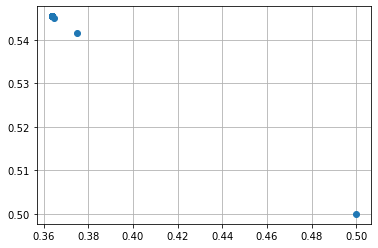

In [49]:
plt.plot(lista1, lista2,  'o' )
plt.grid()

### Gauss-Seidel en forma matricial

In [66]:
A = np.array([[20, 3, 5, -4], [-3, 20, -7, 0], [9, -4, 60, -1], [-8, 1, -1, 50]], float)
B = np.array([[7], [-9], [6],[8]], float)
bb = np.array([7, -9, 6, 8])
[filas, columnas] = A.shape
A    # A tiene que ser diagonal dominante o positiva definida

array([[20.,  3.,  5., -4.],
       [-3., 20., -7.,  0.],
       [ 9., -4., 60., -1.],
       [-8.,  1., -1., 50.]])

In [67]:
# ver si es diagonal dominante 
count = 0
for i in range(filas):
    suma_sin_diagonal = sum(abs(A[i])) - A[i, i]
    if A[i, i] >= suma_sin_diagonal:
        count += 1
if count == filas:
    diag_domin = True
else:
    diag_domin = False
    
# ver si es positiva definida
eigenvalores = np.linalg.eigvals(A)
contador = 0
for eigens in eigenvalores:
    if eigens > 0:
        contador += 1
if contador == len(eigenvalores) and type(eigenvalores[0]) != np.complex128: # ver si los eigenvalores son positivos y reales
    posit_def = True
else: 
    posit_def = False


In [68]:
# definiendo la aproximación inicial, tolerancia y error
x0 = np.zeros([n, 1], float)
x = np.zeros([n, 1], float)
error = np.inf
tol = 0.000001
I = np.identity(n)
L = np.zeros([n, n], float)
D = np.zeros([n, n], float)
U = np.zeros([n, n], float)
for i in range(n):
    for j in range(n):
        if i==j:
            D[i, j] = A[i, j]
        elif i>j:
            L[i, j] = A[i, j]
        elif i<j:
            U[i, j] = A[i, j]

M = -np.matmul(np.linalg.inv(I + np.matmul(np.linalg.inv(D), L)), np.matmul(np.linalg.inv(D), U))
N = np.matmul(np.linalg.inv(I + np.matmul(np.linalg.inv(D), L)), np.matmul(np.linalg.inv(D), B)) 

if filas == columnas and (diag_domin == True or (posit_def == True and np.array_equal(A, A.T) == True)):
    while error > tol:
        x = np.matmul(M, x0) + N
        suma = 0
        for j in range(n):
            suma += (x[j]-x0[j])**2
        error = np.sqrt(suma)
        x0 = np.copy(x)
    print(x)
    print(error)
    print(f'iteraciones totales: {cont}')
else:
    print('el sistema no es cuadrado o diagonal dominante o positivo definido y simétrico')

[[ 0.45203208]
 [-0.37835446]
 [ 0.01097342]
 [ 0.24011169]]
[6.6918195e-07]
iteraciones totales: 9
